# Data

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
def y_one_hot_encoding(Y):
    N = len(Y)
    K = len(set(Y))
    I = np.zeros((N, K))
    I[np.arange(N), Y] = 1
    return I 

In [3]:
data = pd.read_csv('D:/assets/data/fashion-mnist/fashion-mnist_train.csv')
data = data.as_matrix()
np.random.shuffle(data)
data.shape 

(60000, 785)

In [4]:
X = data[:, 1:].reshape(-1, 28, 28, 1) / 255.0
Y = data[:, 0].astype(np.int32)
print(X.shape)
print(Y.shape)

(60000, 28, 28, 1)
(60000,)


In [5]:
K = len(set(Y))
Y = y_one_hot_encoding(Y)
Y.shape

(60000, 10)

# Model

In [7]:
model = Sequential()

model.add(Conv2D(input_shape=(28, 28, 1), filters=32, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(filters=64, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(filters=128, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(units=300))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(units=K))
model.add(Activation('softmax'))

model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

model.summary()

Model: &quot;sequential&quot;
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 26, 26, 32)        128       
_________________________________________________________________
activation (Activation)      (None, 26, 26, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 11, 11, 64)        256       
_________________________________________________________________
activation_1 (Activation)    (None, 11, 11, 64

In [9]:
history = model.fit(X, Y, validation_split=0.33, epochs=15, batch_size=32)

Epoch 1/15
1257/1257 [==============================] - 10s 8ms/step - loss: 0.5037 - accuracy: 0.8178 - val_loss: 0.3779 - val_accuracy: 0.8585
Epoch 2/15
1257/1257 [==============================] - 9s 7ms/step - loss: 0.3541 - accuracy: 0.8698 - val_loss: 0.4089 - val_accuracy: 0.8494
Epoch 3/15
1257/1257 [==============================] - 10s 8ms/step - loss: 0.3076 - accuracy: 0.8883 - val_loss: 0.4062 - val_accuracy: 0.8528
Epoch 4/15
1257/1257 [==============================] - 9s 7ms/step - loss: 0.2742 - accuracy: 0.8977 - val_loss: 0.3173 - val_accuracy: 0.8861
Epoch 5/15
1257/1257 [==============================] - 9s 7ms/step - loss: 0.2428 - accuracy: 0.9109 - val_loss: 0.3513 - val_accuracy: 0.8797
Epoch 6/15
1257/1257 [==============================] - 10s 8ms/step - loss: 0.2202 - accuracy: 0.9173 - val_loss: 0.3108 - val_accuracy: 0.8872
Epoch 7/15
1257/1257 [==============================] - 9s 7ms/step - loss: 0.1997 - accuracy: 0.9255 - val_loss: 0.3231 - val_accura

In [10]:
print(history.history.keys())

dict_keys([&#39;loss&#39;, &#39;accuracy&#39;, &#39;val_loss&#39;, &#39;val_accuracy&#39;])


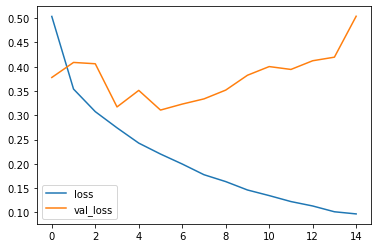

In [11]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

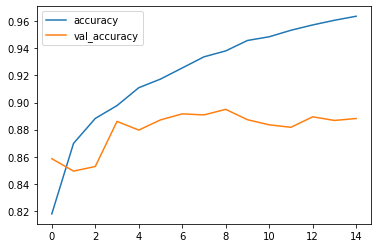

In [13]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()